<a href="https://colab.research.google.com/github/mpfoster/Biochem6765/blob/master/fit_xy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generic Python script for plotting and fitting xy data 
Requires numpy, matplotlib and scipy.optimize

MPF 2022-01-04

[0.08585735 6.56189363] [[5.53469828e-06 1.05936974e-03]
 [1.05936974e-03 2.29173079e-01]]


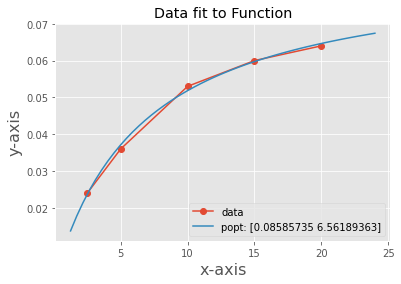

In [1]:
# Generic x/y plotting and fitting in Python; MPF 2021-12
#
# Import commonly used libraries; this should not need edits
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Your data here: ******
# define x and y data here; n should match:
xval = 2.5,5.0,10.0,15.0,20.0 # comma-separated x-values
yval = 0.024, 0.036, 0.053, 0.060, 0.064 #  comma-separated y values

# These commands convert to lists to arrays for doing math on them
x = np.array(xval); y = np.array(yval)
# Optionally, specify math on xval, yval; e.g., np.log(xval), 1/yval, 10*xval
x = xval; y = yval 


'''
Now, specify the function to be modeled and fit.
for example, for a straight line for the form y = m*x + b, 
we would need two parameters, m and b, and the independent variable x.
So, the function definition would look like this:
def myfunc(x,m,b):
  return x*m + b

We can use myfunc by giving values of x, m and b; for example:
y = myfunc(1,2,1)
print(y) # would print the result (3, in this case)
(x can be an array of numbers, generating an array of y values)
'''

# function definition
def myfunc(S, Vmax, Km):
  return S*Vmax/(S+Km) # this is the MM eq.

vars = 1,1 # values of variables for myfunc

# optional customizations:
# see https://matplotlib.org/ for more info
marker = 'o-' # marker '' for default; 'o-' for circle-dash, '--', '..'
xlab = 'x-axis' # change the text in quotes per your data
ylab = 'y-axis' # change the text in quotes per your data
title = 'Title' # change the text in quotes per your data
style = 'ggplot' # specify plot style here; examples at
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# if high-resolution plot is desired:
plotfile = '' # options are 'pdf', 'png' or 'svg'; blank just prints to screen

# should not need to edit items below this line
# --------
plt.style.use(style)

plt.plot(x,y,marker, label='data')
plt.xlabel(xlab,fontsize=16); plt.ylabel(ylab,fontsize=16)
plt.title(title,fontsize=16)

# for fitting
popt,pcov = opt.curve_fit(myfunc,x,y, vars)
print(popt,pcov)
xcalc = np.linspace(0.5*min(x), 1.2*max(x))
ycalc = myfunc(xcalc,*popt)
plt.plot(xcalc,ycalc, label='popt: ' + str(popt))
#plt.plot(xcalc,ycalc, label=popt)
plt.legend()
plt.title('Data fit to Function')

# save output?
if plotfile == 'png':
  plt.savefig('plot.png', dpi=300) 
elif plotfile == 'pdf':
  plt.savefig('plot.pdf')
elif plotfile == 'svg':
  plt.savefig('plot.svg')
else:
  plt.show()